# Explores data from bike counters in Montreal to corroborate assumptions in the analysis of Bixi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_velo18 = pd.read_csv('../data/velo/comptagevelo2018.csv')
df_velo17 = pd.read_csv('../data/velo/comptagevelo2017.csv')
df_velo16 = pd.read_csv('../data/velo/comptagevelo2016.csv')
df_velo15 = pd.read_csv('../data/velo/comptagevelo2015.csv')
df_velo14 = pd.read_csv('../data/velo/comptagevelo2014.csv')
df_velo_loca = pd.read_csv('../data/velo/localisationcompteursvelo2015.csv')

In [3]:
df_velo18.head()

,Date,Unnamed: 1,Berri1,Boyer,Boyer 2,Brébeuf,Christophe-Colomb,CSC (Côte Sainte-Catherine),Eco-Display Parc Stanley,Eco-Totem - Métro Laurier,...,Parc,PierDup,Pont Jacques-Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent/Bellechasse,Saint-Urbain,Viger
0,01/01/2018,00:00,29,30,18.0,2,8.0,7,NaN,52,...,15,0,8.0,40,62,7,3,58,13,NaN
1,02/01/2018,00:00,94,71,32.0,0,6.0,23,NaN,78,...,38,0,5.0,92,144,35,3,143,23,NaN
2,03/01/2018,00:00,200,149,54.0,0,30.0,58,NaN,112,...,76,4,9.0,160,273,62,37,314,21,NaN
3,04/01/2018,00:00,230,156,95.0,2,30.0,67,NaN,157,...,95,2,13.0,212,369,61,23,373,20,NaN
4,05/01/2018,00:00,125,89,33.0,3,2.0,32,NaN,263,...,41,1,3.0,101,209,18,12,160,53,NaN


In [4]:
print('2018' , df_velo18.shape)
print('2017' , df_velo17.shape)
print('2016' , df_velo16.shape)
print('2015' , df_velo15.shape)
print('2014' , df_velo14.shape)

2018 (365, 25)
2017 (365, 21)
2016 (366, 20)
2015 (365, 20)
2014 (365, 21)


In [5]:
df_velo = df_velo14.append([df_velo15 , df_velo16 , df_velo17 , df_velo18] , ignore_index=True)
df_velo.shape

(1826, 29)

In [6]:
df_velo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         1826 non-null   object 
 1   Unnamed: 1                   1826 non-null   object 
 2   Rachel / Papineau            1826 non-null   int64  
 3   Berri1                       1826 non-null   int64  
 4   Maisonneuve_1                365 non-null    float64
 5   Maisonneuve_2                1781 non-null   float64
 6   Brébeuf                      1826 non-null   int64  
 7   Parc                         1826 non-null   int64  
 8   PierDup                      1826 non-null   int64  
 9   CSC (Côte Sainte-Catherine)  1804 non-null   float64
 10  Pont_Jacques_Cartier         621 non-null    float64
 11  Totem_Laurier                1096 non-null   float64
 12  Notre-Dame                   1813 non-null   float64
 13  Rachel / Hôtel de 

In [7]:
df_velo = df_velo.drop(columns=["Unnamed: 1"])
df_velo['Date'] = pd.to_datetime(df_velo['Date'] , dayfirst=True)

In [8]:
df_velo.isnull().sum()

Date                              0
Rachel / Papineau                 0
Berri1                            0
Maisonneuve_1                  1461
Maisonneuve_2                    45
Brébeuf                           0
Parc                              0
PierDup                           0
CSC (Côte Sainte-Catherine)      22
Pont_Jacques_Cartier           1205
Totem_Laurier                   730
Notre-Dame                       13
Rachel / Hôtel de Ville         209
Saint-Antoine                     0
René-Lévesque                     0
Viger                           579
Boyer                             0
Maisonneuve_3                     1
University                      730
Saint-Urbain                    316
Boyer 2                        1115
Christophe-Colomb              1140
Eco-Totem - Métro Laurier      1096
Pont Jacques-Cartier           1171
Saint-Laurent/Bellechasse      1096
Eco-Display Parc Stanley       1609
Edmond Valade                  1461
Gouin / Lajeunesse          

In [9]:
df_velo_loca.head()

,id,nom,nom_comptage,Etat,Type,Annee_implante,coord_X,coord_Y
0,1,St-Urbain_1,Saint-Urbain,Existant,compteur,2014,-73.588882,45.519549
1,2,Brébeuf_1,Brébeuf,Existant,compteur,2009,-73.573984,45.527411
2,4,Maisonneuve_1,Maisonneuve_1,a reinstaller,compteur,2008,-73.561591,45.514785
3,5,Maisonneuve_2,Maisonneuve_2,Existant,compteur,2008,-73.575078,45.500544
4,6,RRachel / Papineau,Rachel / Papineau,Existant,compteur,2007,-73.569649,45.530355


In [10]:
df_velo_loca.shape

(21, 8)

In [11]:
df_velo['Total'] = df_velo.sum(axis = 1, skipna = True)
df_velo.head()

,Date,Rachel / Papineau,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,...,Saint-Urbain,Boyer 2,Christophe-Colomb,Eco-Totem - Métro Laurier,Pont Jacques-Cartier,Saint-Laurent/Bellechasse,Eco-Display Parc Stanley,Edmond Valade,Gouin / Lajeunesse,Total
0,2014-01-01,21,9,22.0,28.0,0,14,3,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.0
1,2014-01-02,43,9,18.0,41.0,0,14,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313.0
2,2014-01-03,73,28,34.0,64.0,0,32,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527.0
3,2014-01-04,71,27,21.0,59.0,0,22,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,427.0
4,2014-01-05,117,55,25.0,73.0,0,21,10,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.0


Text(0.5, 1.0, 'Average number of bikes')

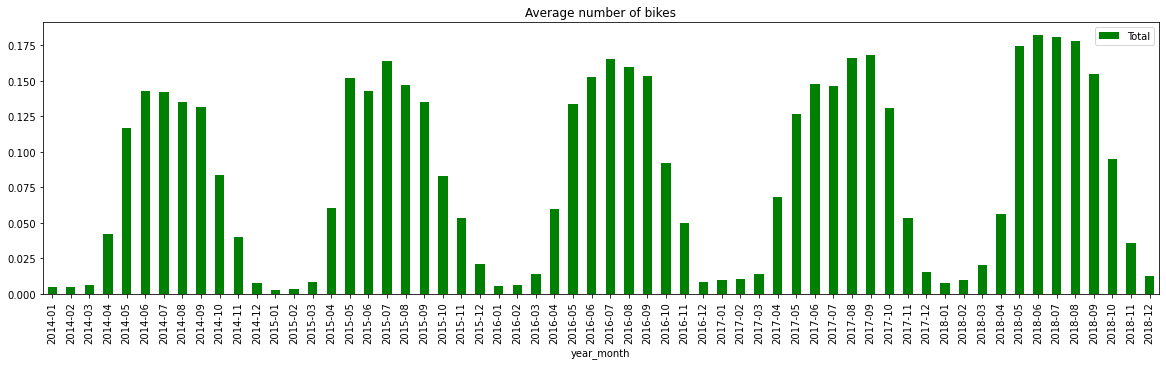

In [30]:
#plt.figure(figsize=(50,5))
df_velo['year_month'] = df_velo.Date.dt.to_period('M') #add new column with year and month

(df_velo[['year_month' , 'Total']].groupby('year_month').sum()/(df_velo['Total'].sum()/5)).plot(kind="bar" , color="green")
plt.gcf().set_size_inches(20, 5)
plt.title("Average number of bikes")